# Imports

In [1]:
!pip install --upgrade pyalgotrading

In [2]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [3]:
connection = AlgoBullsConnection()

In [4]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [5]:
API_TOKEN = "44533df9f3320eaafcd6f4b297edaa697070f36c"
connection.set_access_token(API_TOKEN)

# Strategy Creation

In [6]:
from reverse_rsi_crossover_v2 import ReverseRSICrossoverV2 as strategy_cls

In [7]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'data': 'success',
 'cstcId': 123720,
 'strategyId': 'dfd9298926044204b77f51877936d936'}

In [8]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [9]:
instrument = connection.search_instrument('AAPL', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:AAPL'

In [10]:
instrument = connection.search_instrument('NVDA', exchange='NASDAQ')[0]['value']
instrument

'NASDAQ:NVDA'

## Setup Parameters

In [11]:
vendor_details = {
    'brokerName': 'ALPACAV2',
    'credentialParameters': {
        'CLIENT_API_KEY': 'PKPR0D9M7AAZSKIPEZW0', 
        'CLIENT_API_SECRET': 'o0Of72gD4jiVrmkq6P3RmggEbhjEhbak0c3RY0Eb'
    }
}

In [12]:
# For RT
broking_details = vendor_details
# for our case, vendor and broker both are same - Alpaca

In [13]:
parameters = {
  'TIMEPERIOD': 20,
  'OVERSOLD_VALUE': 30,
  'OVERBOUGHT_VALUE': 70
}

## Backtesting

### Start

In [14]:
connection.backtest(
    strategy=strategy, 
    start='2023-05-01 09:15 -0400', 
    end='2023-05-11 15:30 -0400', 
    instrument=['NASDAQ:MSFT', 'NASDAQ:AAPL'], 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    vendor_details=vendor_details
)

Strategy Trades have been deleted successfully 
Setting Strategy Config... Success.
Submitting BACKTESTING job... Success.


### Status

In [16]:
connection.get_backtesting_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [17]:
logs = connection.get_backtesting_logs(strategy)
print(logs)

[2023-06-10 19:03:23] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-06-10 19:03:23] Sanity checks on cfg successful.
[2023-06-10 19:03:23] Currency set to "USD"
[2023-06-10 19:03:23] Setting up broker connection...
[2023-06-10 19:03:25] Broker connection has been setup successfully.
[2023-06-10 19:03:25] (NASDAQ_EQ) Funds available in client's ABVIRTUALBROKER account is : USD '1000000000.00'
[2023-06-10 19:03:25] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-06-10 19:03:25] Welcome ALGOBULLS VIRTUAL USER!
[2023-06-10 19:03:25] Reading strategy...
[2023-06-10 19:03:25] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2023-05-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2023-05-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      

### Stop

In [18]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


## Profit and Loss Reports

In [19]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

instrument_segment instrument_tradingsymbol     entry_timestamp  \
0              NASDAQ                     MSFT 2023-05-01 19:03:00   
1              NASDAQ                     MSFT 2023-05-02 19:00:00   
2              NASDAQ                     AAPL 2023-05-02 19:05:00   
3              NASDAQ                     AAPL 2023-05-02 19:43:00   
4              NASDAQ                     AAPL 2023-05-03 19:18:00   
5              NASDAQ                     AAPL 2023-05-03 19:28:00   
6              NASDAQ                     AAPL 2023-05-03 19:32:00   
7              NASDAQ                     AAPL 2023-05-04 20:42:00   
8              NASDAQ                     AAPL 2023-05-04 20:45:00   
9              NASDAQ                     AAPL 2023-05-05 19:19:00   
10             NASDAQ                     MSFT 2023-05-05 20:06:00   
11             NASDAQ                     MSFT 2023-05-05 20:10:00   
12             NASDAQ                     MSFT 2023-05-05 20:13:00   
13             NASDAQ                     AAPL 2023-05-08 19:00:00   
14             NASDAQ                     AAPL 2023-05-09 19:02:00   
15             NASDAQ                     AAPL 2023-05-09 19:04:00   
16             NASDAQ                     MSFT 2023-05-09 19:08:00   
17             NASDAQ                     MSFT 2023-05-11 19:03:00   
18             NASDAQ                     MSFT 2023-05-11 19:10:00   
19             NASDAQ                     AAPL 2023-05-11 19:33:00   

   entry_transaction_type  entry_quantity entry_currency  entry_price  \
0                    SELL               5              ₹       307.40   
1                    SELL               5              ₹       307.77   
2                    SELL               5              ₹       170.21   
3                     BUY               5              ₹       169.02   
4                    SELL               5              ₹       170.37   
5                    SELL               5              ₹       170.74   
6                    SELL               5              ₹       170.78   
7                    SELL               5              ₹       166.69   
8                    SELL               5              ₹       166.66   
9                    SELL               5              ₹       173.03   
10                   SELL               5              ₹       308.95   
11                   SELL               5              ₹       309.04   
12                   SELL               5              ₹       309.14   
13                    BUY               5              ₹       172.48   
14                   SELL               5              ₹       173.01   
15                   SELL               5              ₹       173.01   
16                   SELL               5              ₹       308.97   
17                    BUY               5              ₹       308.67   
18                    BUY               5              ₹       306.86   
19                    BUY               5              ₹       172.46   

        exit_timestamp exit_transaction_type  exit_quantity exit_currency  \
0  2023-05-02 01:00:00                   BUY              5             ₹   
1  2023-05-03 01:00:00                   BUY              5             ₹   
2  2023-05-02 19:43:00                   BUY              5             ₹   
3  2023-05-03 01:00:00                  SELL              5             ₹   
4  2023-05-03 19:25:00                   BUY              5             ₹   
5  2023-05-03 19:31:00                   BUY              5             ₹   
6  2023-05-04 01:00:00                   BUY              5             ₹   
7  2023-05-04 20:44:00                   BUY              5             ₹   
8  2023-05-05 01:00:00                   BUY              5             ₹   
9  2023-05-06 01:00:00                   BUY              5             ₹   
10 2023-05-05 20:07:00                   BUY              5             ₹   
11 2023-05-05 20:12:00                   BUY              5             ₹ 

## Statistics Reports

### Statistics

In [20]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...
                    Strategy
------------------  ----------
Start Period        2023-05-01
End Period          2023-05-11
Risk-Free Rate      0.0%
Time in Market      95.0%

Cumulative Return   0.0%
CAGR﹪              0.0%

Sharpe              6.6
Prob. Sharpe Ratio  96.81%
Sortino             19.25
Sortino/√2          13.61
Omega               3.31

Max Drawdown        -0.0%
Longest DD Days     6

Gain/Pain Ratio     9.43
Gain/Pain (1M)      -

Payoff Ratio        2.98
Profit Factor       3.31
Common Sense Ratio  11.43
CPC Index           5.18
Tail Ratio          3.45
Outlier Win Ratio   2.57
Outlier Loss Ratio  2.59

MTD                 0.0%
3M                  0.0%
6M                  0.0%
YTD                 0.0%
1Y                  0.0%
3Y (ann.)           0.0%
5Y (ann.)           0.0%
10Y (ann.)          0.0%
All-time (ann.)     0.0%

Avg. Drawdown       -0.0%
Avg. Drawdown Days  3
Recovery Factor     5.17
Ulcer Index         

### Quantstats Full Report

Generating Statistics for already fetched P&L data...


                           Strategy
-------------------------  ----------
Start Period               2023-05-01
End Period                 2023-05-11
Risk-Free Rate             0.0%
Time in Market             95.0%

Cumulative Return          0.0%
CAGR﹪                     0.0%

Sharpe                     6.6
Prob. Sharpe Ratio         96.81%
Smart Sharpe               6.29
Sortino                    19.25
Smart Sortino              18.34
Sortino/√2                 13.61
Smart Sortino/√2           12.97
Omega                      3.31

Max Drawdown               -0.0%
Longest DD Days            6
Volatility (ann.)          0.0%
Calmar                     188.61
Skew                       0.0
Kurtosis                   0.0

Expected Daily %           0.0%
Expected Monthly %         0.0%
Expected Yearly %          0.0%
Kelly Criterion            36.72%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.0%
Expected Shortfall (cVaR)  -0.0%

Max Consecutive Wins       2
Max Conse

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2023-05-02  2023-05-03  2023-05-09     6 -9.850000e-07     -9.050000e-07
2  2023-05-11  2023-05-11  2023-05-11     0 -3.450000e-07      0.000000e+00

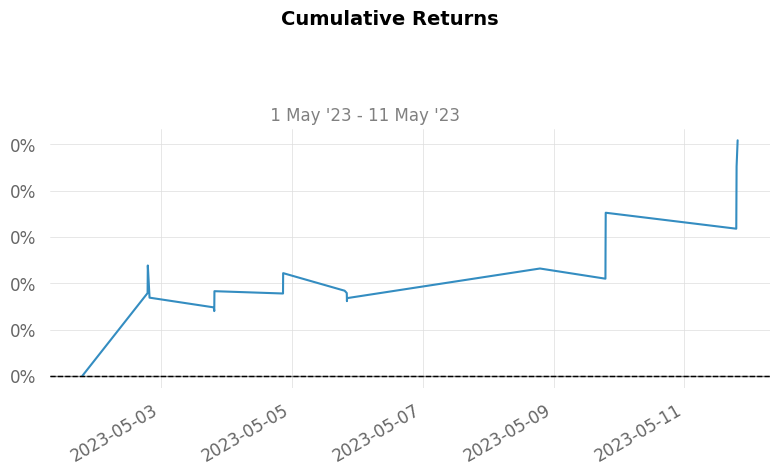

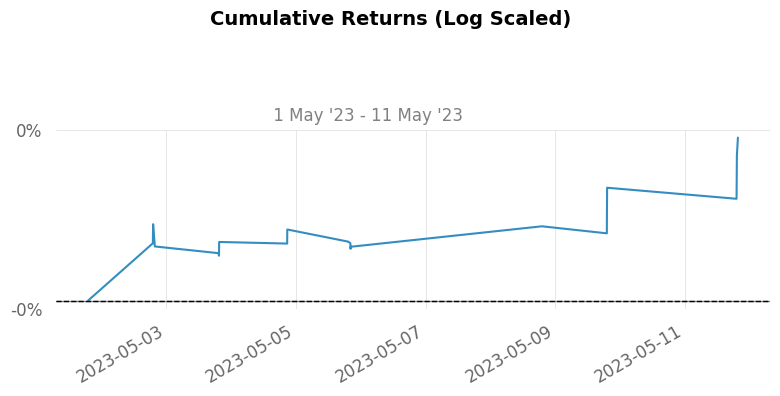

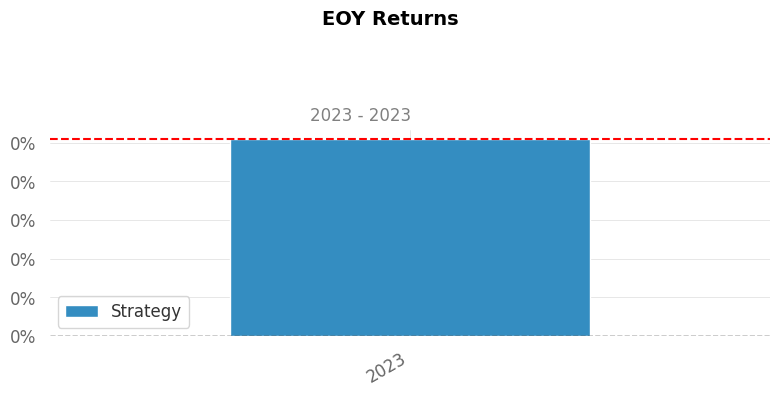

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/_plotting/core.py:355: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  _sns.kdeplot(returns, color='black', linewidth=1.5)


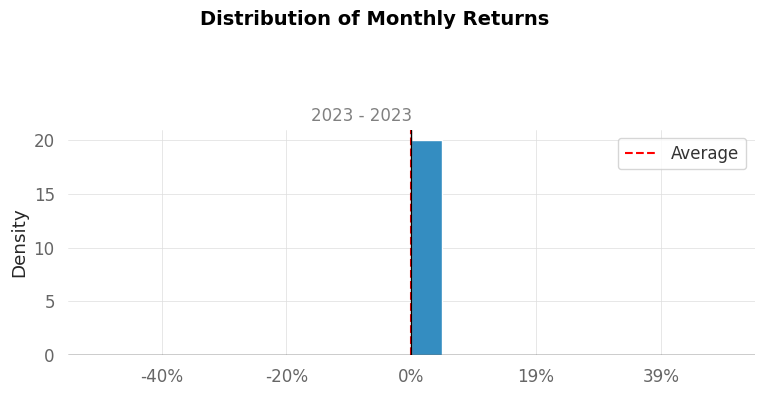

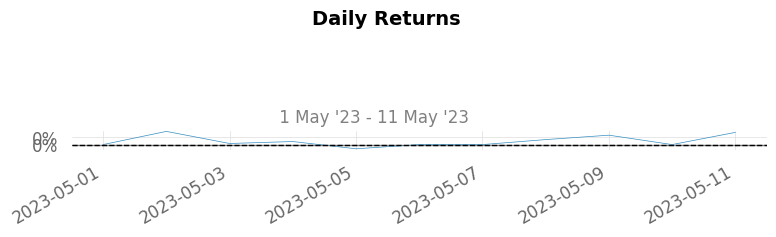

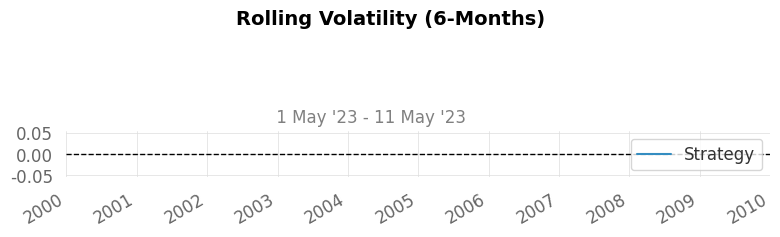

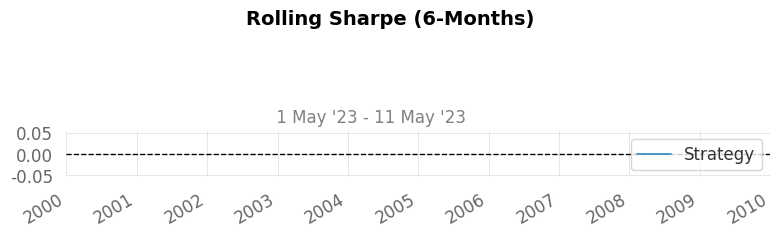

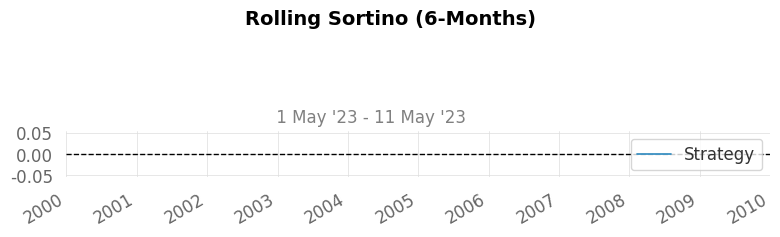

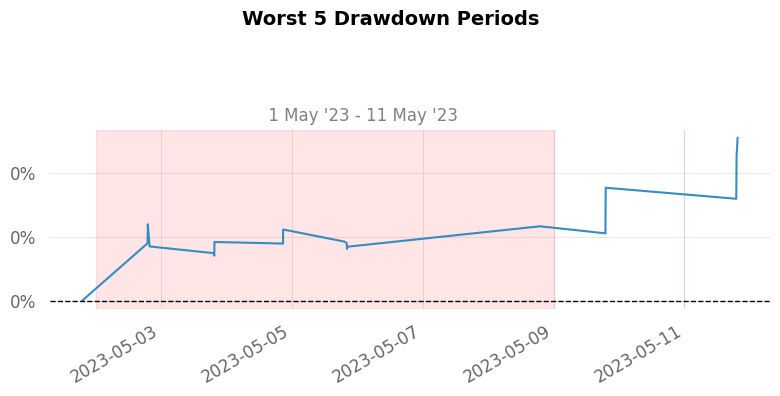

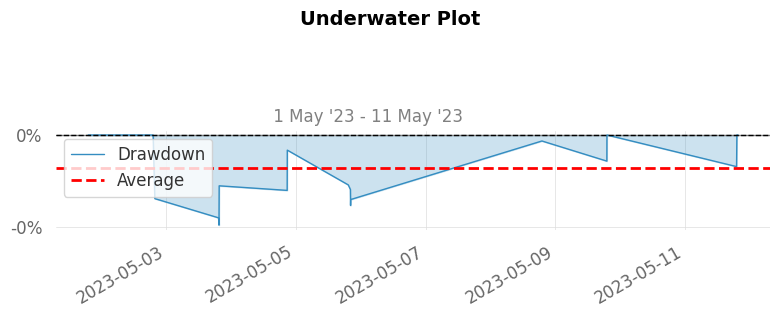

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


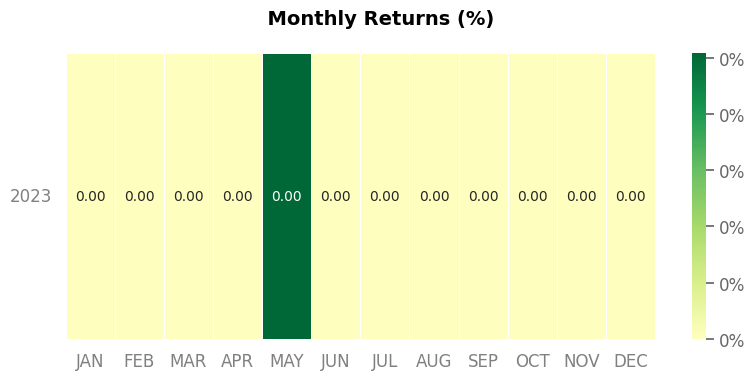

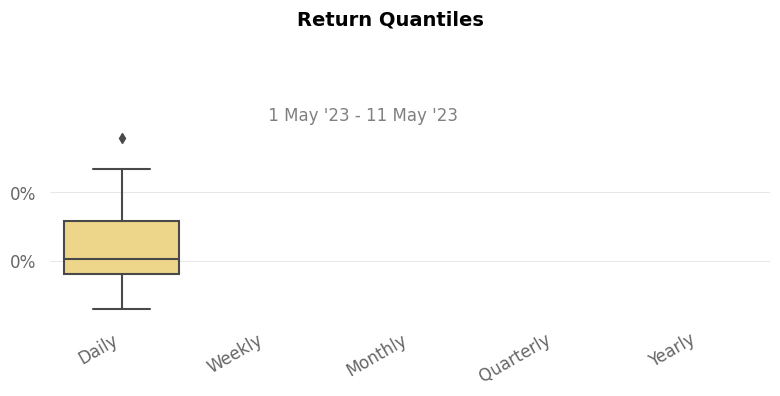

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/_plotting/core.py:355: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  _sns.kdeplot(returns, color='black', linewidth=1.5)
/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [21]:
connection.get_backtesting_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

## Order History

In [22]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+----------------+---------------------------+----------------------------------+------+
| INST           | TIME                      | ID                               | TT   |
|----------------+---------------------------+----------------------------------+------|
| NASDAQ_EQ:MSFT | 2023-05-01 09:33:00-04:00 | c0503d9da297466d84ca9ac1eacf84cf | SELL |
+----------------+---------------------------+----------------------------------+------+
+----+----------------------------------+------------------------+-------+
|    | TIME                             | STATE                  | MSG   |
|----+----------------------------------+------------------------+-------|
|  0 | 2023-05-01 09:33:00.500000-04:00 | PUT ORDER REQ RECEIVED |       |
|  1 | 2023-05-01 09:33:00.500000-04:00 | VALIDATION PENDING     |       |
|  2 | 2023-05-01 09:33:00.500000-04:00 | OPEN PENDING           |       |
|  3 | 2023-05-01 09:33:00.500000-04:00 | OPEN                   |       |
|  4 | 2023-05-01 09:33:00.5

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='0:15 -0400', 
    end='9:00 -0400', 
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Papertrading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Papertrading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Papertrading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

## Realtrading

### Start

In [ ]:
connection.realtrade(
    strategy=strategy, 
    start='8:00 -0400', 
    end='15:00 -0400', 
    instruments='NASDAQ:NVDA', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
    broking_details=broking_details
)

### Status

In [ ]:
connection.get_realtrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_realtrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_realtrading_job(strategy)

### Profit and Loss Reports (Realtrading)

In [ ]:
pnl_reports = connection.get_realtrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Realtrading)

#### Statistics

In [ ]:
connection.get_realtrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_realtrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Realtrading)

In [ ]:
order_history = connection.get_realtrading_report_order_history(strategy)
print(order_history)